# Part 3. Tensorflow tutorial - Image segmentation

### Goal of this tutorial:
###     Build and train a model which segments aorta in CT images

## (1) Labelling train images

In [1]:
# Create ground-truth mask image on Slicer software

In [24]:
import nibabel as nb
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Sequential
import tensorflow as tf

%matplotlib inline

In [25]:
import glob
import shutil
import os
import random
from PIL import Image

#import seaborn as sns

import pandas as pd
import numpy as np

#from sklearn.model_selection import train_test_split,StratifiedKFold

In [26]:
from tensorflow.keras.layers import Dense, Input, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization,Add,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import LeakyReLU, ReLU, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, UpSampling2D, concatenate
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K

In [27]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


In [28]:
# Load train images
dataset_dir = ...

In [29]:
img_size = (160, 160) 
num_classes = 4 
batch_size = 32

In [30]:
# Load train images

ct_dir = './aorta-ct-scans/local_ct_total_data'
ct_filelist = [os.path.join(ct_dir,file) 
                  for file 
                  in os.listdir(ct_dir) 
                  if file.endswith('nii')]

print('number of slices : {0}'.format(len(ct_filelist)))

number of slices : 51


In [31]:
ct_filelist

['./aorta-ct-scans/local_ct_total_data\\CT (1).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (10).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (11).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (12).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (13).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (14).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (15).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (16).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (17).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (18).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (19).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (2).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (20).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (21).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (22).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (23).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (24).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (25).nii',
 './aorta-ct-scans/local_ct_to

In [32]:
# Load segmentation images

segmentation_dir = './aorta-ct-scans/local_segmentation_total_data'
segmentation_filelist = [os.path.join(segmentation_dir,file) 
                  for file 
                  in os.listdir(segmentation_dir) 
                  if file.endswith('nii')]

print('number of slices : {0}'.format(len(segmentation_filelist)))

number of slices : 51


In [33]:
segmentation_filelist

['./aorta-ct-scans/local_segmentation_total_data\\Segmentation (1).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (10).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (11).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (12).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (13).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (14).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (15).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (16).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (17).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (18).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (19).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (2).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (20).nii',
 './aorta-ct-scans/local_segmentation_to

In [34]:
ct_list=[]
    
    
for (root, directories, files) in os.walk(ct_dir):
    for d in directories:
        d_path = os.path.join(root, d)
        #print(d_path)

    for file in files:
        file_path = os.path.join(root, file)
        ct_list.append(file_path)


In [35]:
segmentation_list=[]
    
    
for (root, directories, files) in os.walk(segmentation_dir):
    for d in directories:
        d_path = os.path.join(root, d)
        #print(d_path)

    for file in files:
        file_path = os.path.join(root, file)
        segmentation_list.append(file_path)



In [36]:
# Visualize sample CT and segmentation images 두개 겹치게 놓던가 쌍으로 나오게 하기

sample_ct = nb.load(...)
sample_ct = sample_ct.get_fdata()
sample_ct = sample_ct[:,:,100]

window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}

plt.figure(figsize=(8, 8))
plt.imshow(sample_ct.T, cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

TypeError: stat: path should be string, bytes, os.PathLike or integer, not ellipsis

In [37]:
sample_mask = nb.load(...)
sample_mask = sample_mask.get_fdata()
sample_mask = sample_mask[:,:,100]

plt.figure(figsize=(8, 8))
plt.imshow(sample_mask.T, cmap='gray')

TypeError: stat: path should be string, bytes, os.PathLike or integer, not ellipsis

In [38]:
%matplotlib inline

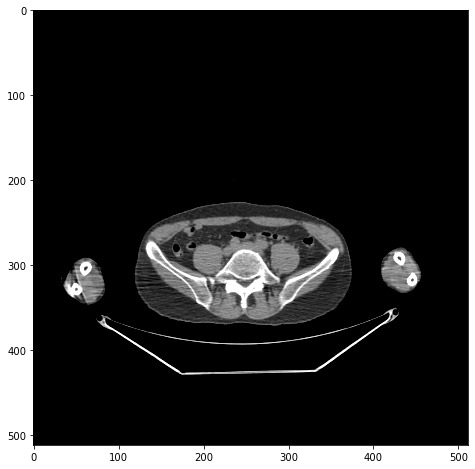

In [39]:
# Visualize sample CT and segmentation images 두개 겹치게 놓던가 쌍으로 나오게 하기

sample_ct1 = nb.load(ct_list[1])
sample_ct2 = sample_ct1.get_fdata()
sample_ct = sample_ct2[:,:,100]

window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}
#mediastinum이 제일 잘보임
plt.figure(figsize=(8, 8))
plt.imshow(sample_ct.T, cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

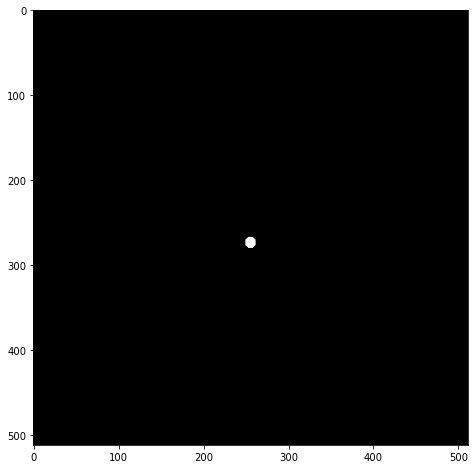

In [40]:
sample_mask1 = nb.load(segmentation_list[0])
sample_mask2 = sample_mask1.get_fdata()
sample_mask = sample_mask2[:,:,100]

plt.figure(figsize=(8, 8))
plt.imshow(sample_mask, cmap='gray')

In [41]:
window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}

class IndexTracker:
    def __init__(self, ax, X, window='mediastinum'):
        self.ax = ax
        self.X = X
        #rows, self.cols, slices = X.shape
        self.rows, cols, slices = X.shape  #
        #height, width, channel = X.shape
        self.window = window_set[window]
        self.ind = 0 # set initial state
        
        #M = cv2.getRotationMatrix2D((width/2.0, height/2.0),90,1) #회전
        #self.X = cv2.warpAffine(self.X,M,(width,height)) #회전 다만 화면이 잘리고 늘려짐..
        #self.X = cv2.resize(self.X,(width,height), fx=10, fy=10)
        #self.X = cv2.resize(self.X, dsize=(width,height), interpolation=cv2.INTER_AREA)
        
        self.im = ax.imshow(self.X[self.ind,:,:], cmap='gray',vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

        #self.X[:,:,self.ind]
            
        
        self.update()
        
    def on_scroll(self, event):
        if event.button == 'up':
            # self.ind = (self.ind - 5) % self.slices
            self.ind = (self.ind - 1) % self.rows#
        else:
            # self.ind = (self.ind + 5) % self.slices
            self.ind = (self.ind + 1) % self.rows#
            
        self.update()
        
    def update(self):
        self.im.set_data(self.X[self.ind,:,:])#
        self.ax.set_ylabel('row %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
def plot3d(image, window='mediastinum', size=(8,8)):
    fig, ax = plt.subplots(1, 1, gridspec_kw=dict(top=1, bottom=0, left=0.08, right=0.96), figsize=size)
    tracker = IndexTracker(ax, image, window=window)
    fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
    plt.show()
    return tracker

# ct사진 스크롤(0번째 사진)

In [42]:
# stack 2d images to create 3d volume

vol_array = np.array([sample_ct1.get_fdata() for file in ct_filelist])
vol_array = np.moveaxis(vol_array, 0, -1) #축을 새위치로 이동(0,-1)


In [43]:
print('Volume shape = {0}'.format(vol_array[...,0].shape))

Volume shape = (512, 512, 335)


In [44]:
%matplotlib qt

In [45]:
plot3d(vol_array[...,0].T, window='mediastinum', size=(12,12))

# mask사진 스크롤(0번째 사진)

In [46]:
window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}

class IndexTracker_m:
    def __init__(self, ax, X):
        self.ax = ax
        self.X = X
        #rows, self.cols, slices = X.shape
        self.rows, cols, slices = X.shape  #
        #height, width, channel = X.shape
    
        self.ind = 0 # set initial state
        
        #M = cv2.getRotationMatrix2D((width/2.0, height/2.0),90,1) #회전
        #self.X = cv2.warpAffine(self.X,M,(width,height)) #회전 다만 화면이 잘리고 늘려짐..
        #self.X = cv2.resize(self.X,(width,height), fx=10, fy=10)
        #self.X = cv2.resize(self.X, dsize=(width,height), interpolation=cv2.INTER_AREA)
        
        self.im = ax.imshow(self.X[self.ind,:,:], cmap='gray')

        #self.X[:,:,self.ind]
            
        
        self.update()
        
    def on_scroll(self, event):
        if event.button == 'up':
            # self.ind = (self.ind - 5) % self.slices
            self.ind = (self.ind - 1) % self.rows#
        else:
            # self.ind = (self.ind + 5) % self.slices
            self.ind = (self.ind + 1) % self.rows#
            
        self.update()
        
    def update(self):
        self.im.set_data(self.X[self.ind,:,:])#
        self.ax.set_ylabel('row %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
def plot3d_m(image, size=(8,8)):
    fig, ax = plt.subplots(1, 1, gridspec_kw=dict(top=1, bottom=0, left=0.08, right=0.96), figsize=size)
    tracker = IndexTracker_m(ax, image)
    fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
    plt.show()
    return tracker

In [47]:
# stack 2d images to create 3d volume

vol_array_m = np.array([sample_mask1.get_fdata() for file in ct_filelist])
vol_array_m = np.moveaxis(vol_array_m, 0, -1) #축을 새위치로 이동(0,-1)


In [48]:
print('Volume shape = {0}'.format(vol_array_m[...,10].shape))

Volume shape = (512, 512, 299)


In [49]:
plot3d_m(vol_array_m[...,10].T, size=(12,12))

In [ ]:
mask 사진이 안나옴. segmentation사진이 잘못된건지
잘 나왔는데 notebook에서 설정을 잘못해서 

In [16]:
sample_ct.shape

(512, 512)

In [17]:
ct_list

['./aorta-ct-scans/local_ct_total_data\\CT (1).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (10).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (11).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (12).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (13).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (14).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (15).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (16).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (17).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (18).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (19).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (2).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (20).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (21).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (22).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (23).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (24).nii',
 './aorta-ct-scans/local_ct_total_data\\CT (25).nii',
 './aorta-ct-scans/local_ct_to

In [18]:
segmentation_list

['./aorta-ct-scans/local_segmentation_total_data\\Segmentation (1).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (10).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (11).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (12).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (13).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (14).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (15).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (16).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (17).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (18).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (19).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (2).nii',
 './aorta-ct-scans/local_segmentation_total_data\\Segmentation (20).nii',
 './aorta-ct-scans/local_segmentation_to

In [56]:
# save the label data as csv file
# use csv or pandas module to create & save csv file


ct리스트 = ct_list
segmentation리스트= segmentation_list
td = {
    'data_file' : ct리스트,
    'segmentation_file' : segmentation리스트
}



td_dataframe = pd.DataFrame(td)


td_dataframe.to_csv("C:\\jupyter project\\aorta-ct-scans\\ct_segmentation_result.csv") #수정하기
#,index=False
print(td_dataframe)

                                           data_file  \
0    ./aorta-ct-scans/local_ct_total_data\CT (1).nii   
1   ./aorta-ct-scans/local_ct_total_data\CT (10).nii   
2   ./aorta-ct-scans/local_ct_total_data\CT (11).nii   
3   ./aorta-ct-scans/local_ct_total_data\CT (12).nii   
4   ./aorta-ct-scans/local_ct_total_data\CT (13).nii   
5   ./aorta-ct-scans/local_ct_total_data\CT (14).nii   
6   ./aorta-ct-scans/local_ct_total_data\CT (15).nii   
7   ./aorta-ct-scans/local_ct_total_data\CT (16).nii   
8   ./aorta-ct-scans/local_ct_total_data\CT (17).nii   
9   ./aorta-ct-scans/local_ct_total_data\CT (18).nii   
10  ./aorta-ct-scans/local_ct_total_data\CT (19).nii   
11   ./aorta-ct-scans/local_ct_total_data\CT (2).nii   
12  ./aorta-ct-scans/local_ct_total_data\CT (20).nii   
13  ./aorta-ct-scans/local_ct_total_data\CT (21).nii   
14  ./aorta-ct-scans/local_ct_total_data\CT (22).nii   
15  ./aorta-ct-scans/local_ct_total_data\CT (23).nii   
16  ./aorta-ct-scans/local_ct_total_data\CT (24)

## (2) Define train/validation set

In [ ]:
# Passing whole dataset causes memory issue
# Create Data generator class
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence
#한사람당 500mb임 총 50명정도 하려면 gpu가 버티질 못함.
#한꺼번에 모든사람 불러오지 말고 한사람씩 불러오는 클래스
#http://www.kwangsiklee.com/2018/11/keras%EC%97%90%EC%84%9C-sequence%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-%EB%8C%80%EC%9A%A9%EB%9F%89-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0/
class DataGenerator(...):
    
    def __init__(self,...):
        ...
        ...
        
    def __len__(self):
        ...
        ...
        return ...
        
    def __getitem__(self, idx):
        ...
        ...
        return ...

In [43]:
print(np.shape(ct_list))

(51,)


In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Sequence
import math


In [19]:
class DataGenerator(Sequence):
    def __init__(self,
                 files: list,
                 batch_size: int,
                 augmentation: bool = False,
                 shuffle: bool = False,
                 rescale:bool = True) -> None:
        self.files = np.array(files)
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augmentation = augmentation
        self.rescale =rescale

        # shuffle for first epoch
        if self.shuffle:
            self.shuffle_data()

    def __len__(self):
        return math.ceil(len(self.files) / self.batch_size)

    def __getitem__(self, index):
        image_batch = self.files[index * self.batch_size:(index + 1) * self.batch_size]
        
        Xs, Ys = [], []
        for i in range(len(image_batch)):
            image = np.load(image_batch[i])
            Y = image[:,:,-1].reshape(120,120,1)
            Y = np.where(Y < 0, 0, Y)
            X = image[:,:,:4]
            if self.rescale:
                X = X / 255.            
            if self.augmentation:
                pass

            Xs.append(X)
            Ys.append(Y)

        Xs = np.array(Xs)
        Ys = np.array(Ys)

        return Xs, Ys

    @property
    def n_images(self):
        return len(self.files)

In [20]:
trainGen = DataGenerator(train_files, 64, False, False, True)

model.predict(trainGen, batch_size=64, verbose=1, workers=8, use_multiprocessing=True)

NameError: name 'train_files' is not defined

In [47]:
import random
a = random.sample(range(0,50),50) #0부터 200까지의 범위중에 200개를 중복없이
print(a)

[12, 40, 2, 39, 21, 10, 30, 38, 6, 49, 16, 18, 41, 45, 43, 42, 0, 26, 25, 9, 19, 7, 46, 17, 34, 13, 1, 11, 29, 14, 4, 44, 23, 8, 5, 31, 3, 32, 27, 22, 33, 47, 48, 28, 35, 15, 24, 36, 20, 37]


In [48]:
x =[]
y =[]
x_val =[]
y_val =[]

for i in range(40):
    index=a[i]
    ct_data = nb.load(ct_list[index]) #,allow_pickle=True
    x.append(ct_data)
    
    segmentation_data = segmentation_list[index]
    y.append(segmentation_data)

    
for i in range(10):
    index=a[i+40]
    ct_data = nb.load(ct_list[index]) #,allow_pickle=True
    x_val.append(ct_data)

    segmentation_data = segmentation_list[index]
    y_val.append(segmentation_data)

In [ ]:
,data_file,segementation_file


In [21]:
class DataGenerator(keras.utils.Sequence):
    
    def __init__(self, batch_size, img_size, ct_filelist,segmentation_filelist):
        self.batch_size = batch_size
        self.img_size = img_size
        self.ct_filelist = ct_filelist
        self.segmentation_filelist = segmentation_filelist
        
    def __len__(self):
        return len(self.segmentation_filelist) // self.batch_size
        
    def __getitem__(self, idx,arg):#idx=index
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_ct_filelist = self.ct_filelist[i : i + self.batch_size]
        batch_segmentation_filelist = self.segmentation_filelist[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_ct_filelist):
            img = load_img(path, segmentation_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_segmentation_filelist):
            img = load_img(path, segmentation_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [22]:
x =  DataGenerator(ct_list,ct_list,segmentation_list) #ct
#y =   #segmentation(mask)
#x_val = #아직 안해놓음
#y_val =

TypeError: __init__() missing 1 required positional argument: 'segmentation_filelist'

In [ ]:
x =  DataGenerator(ct_list,ct_list,segmentation_list) #ct
y =  DataGenerator(ct_list,ct_list,segmentation_list) #segmentation
x_val = #아직 안해놓음
y_val =

In [29]:
from tensorflow.keras.utils import to_categorical


In [23]:
import numpy as np
from keras.utils import np_utils

In [70]:
class DataGenerator(keras.utils.all_utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True,*args,img_size,):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.img_size = img_size #
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('data/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [33]:
from keras.models import Sequential
#from my_classes import DataGenerator


In [74]:
# Parameters
params = {'dim': (32,32,32),
          'batch_size': 64,
          'img_size': (160, 160),
          'n_classes': 6,
          'n_channels': 1,
          'shuffle': True}

# Datasets
partition = x
labels = y

# Generators
training_generator = DataGenerator('partition[x]', labels, **params)
validation_generator = DataGenerator('partition[x_val]', labels, **params)

# Design model
model = Sequential()
#[...] # Architecture
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy")



## (3) Build and train a model

### Method 1 : U-Net

In [ ]:
# U-Net : https://arxiv.org/abs/1505.04597
# input shape = output shape : (batch_size, 512, 512, 1)

def unet():
    # encoding + decoding layer with skip connection
    # Fully convolutional network without dense layer 
    # FCN : https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf
    
    # tf.keras.layers.Conv2D
    # tf.keras.layers.MaxPool2D
    # tf.keras.layers.BatchNormalization
    # tf.keras.layers.ReLu
    # tf.keras.layers.Conv2DTranspose or tf.keras.layers.UpSampling2D + tf.keras.layers.Conv2D
    # tf.concat
    # Sigmoid activation at last layer
    
    ...
    ...
    
    return model

In [72]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 80, 80, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 80, 80, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [76]:
import random

# Split our img paths into a training and a validation set
val_samples = 10
random.Random(10).shuffle(ct_filelist)
random.Random(10).shuffle(segmentation_filelist)
train_ct_filelist = ct_filelist[:-val_samples]
train_segmentation_filelist = segmentation_filelist[:-val_samples]
val_ct_filelist = ct_filelist[-val_samples:]
val_segmentation_filelist = segmentation_filelist[-val_samples:]


In [80]:
train_gen = DataGenerator(
    batch_size,,img_size, train_ct_filelist, train_segmentation_filelist)
val_gen = DataGenerator(batch_size,img_size,  val_ct_filelist, val_segmentation_filelist)

TypeError: __init__() missing 1 required keyword-only argument: 'img_size'

In [59]:
#Train the model

# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("aorta_segmentation.h5", save_best_only=True)
]



In [75]:
# Train the model, doing validation at the end of each epoch.
epochs = 1
model.fit(x, epochs=epochs, validation_data=x_val)

ValueError: Data is expected to be in format `x`, `(x,)`, `(x, y)`, or `(x, y, sample_weight)`, found: (<nibabel.nifti1.Nifti1Image object at 0x000001B88134B190>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134B0D0>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134B280>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134B340>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134B5B0>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134BF10>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134F3D0>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134F2B0>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134F1F0>, <nibabel.nifti1.Nifti1Image object at 0x000001B88134F100>)

### Method 2 : 3D U-Net

In [ ]:
# 3D Unet : https://arxiv.org/abs/1606.06650
# input shape : (batch_size, 512, 512, height, 1)

def unet_3D():
    
    # tf.keras.layers.Conv3D
    # tf.keras.layers.MaxPool3D
    # tf.keras.layers.BatchNormalization
    # tf.keras.layers.ReLu
    # tf.keras.layers.Conv3DTranspose or tf.keras.layers.UpSampling3D + tf.keras.layers.Conv3D
    # tf.concat
    # Sigmoid activation at last layer
    
    ...
    ...
    
    return model

In [ ]:
# define a optimizer/metrics and compile the model

model.compile(...)


# print summary of this model
model.summary()

In [ ]:
# Start training

model_history = model.fit(...)

## (4) Plot loss and metrics

In [ ]:
model_history.epoch
model_history.history





## (5) Predict on test set images

In [ ]:
model.predict()

## (6) Saving & loading the trained model

In [ ]:
model.save(...)

## (7) Debugging model/dataset